## 12 Logistic Regression pada Binary Classification Task

### Simple Linear Regression


- Hanya dapat menyertakan 1 feature saja 
- Menggunakan x (kecil) untuk merepresentasikan nilai 1 buah feature saja

- $\alpha$ = Merupakan nilai interceptnya.

- $\beta$ = Merupakan nilai slopenya.

- $g (x)$ = $y$ yang merepresentasikan satu buah feature saja.

### Multiple Linear Regression 

- Merepresentasikan lebih dari 1 feature untuk melakukan estimasi nilai
- Menggunakan X (besar) untuk merepresenyasikan sekumpulan nilai feature


X = dapat bernilai banyak, misal x1, x2, ...

### Logistic Regression

- Fungsi sigmoid merupakan persamaan linear dari a + bX

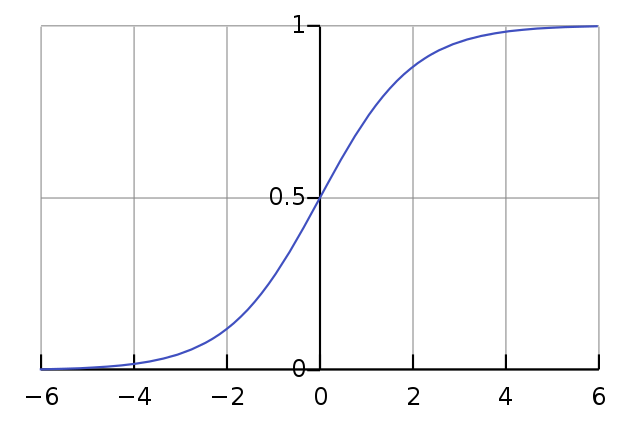

Kurva sigmoid akan berbentuk seperti huruf s. Rentang kurva sigmoid pada contoh adalah -6 sampai 6. Rentang nilai bergantung pada dataset yang kita miliki. Nilai sumbu y akan selalu berada di 0 dan 1 yang akan berkorelasi dengan binomial probability. 

### Dataset : SMS Spam Collection Data Set

Untuk menggunakan dataset SMS, harus mendownload dataset pada link : https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

In [4]:
import pandas as pd

df = pd.read_csv('./Datasets/smsspamcollection/SMSSpamCollection',
                 sep='\t',
                 header=None,
                 names=['label', 'sms'])
df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Import module pandas as pd. Memanggil pd.read_csv yang akan diarahkan juga ke dataset SMS yang di dalamnya juga mengandung sep='\t', header=None, dan names untuk kolom label dan sms, kemudian akan ditampung pada variabel df.


Terdiri dari 2 kolom. Pada kolom sms berisi sekumpulan text sms yang akan dijadikan nilai feature, sedangkan kolom label berisi klasifikasi dari text smsnya. Terdapat 2 label, yaitu ham dan spam. Text yang dikategorikan sebagai spam akan dikategorikan sebagai label spam, sedangkan text yang dikategorikan bukan spam akan memiliki label ham. 

In [5]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

Untuk menghitung berapa banyak data spam dan data ham nya. Dari hasil yang ada, maka dapat diketahui bahwa data berlabel ham jauh lebih banyak dibandingkan data berlabel spam. Kondisi semacam ini dikenal sebagai inballance dataset.

### Training & Testing Dataset

Kelompokkan terlebih dahulu features dan targetnya. Karena target terdiri dari 2 label yang terdiri dari string 2 nilai, yaitu ham dan spam, maka akan menggunakan binarizer untuk mengkonversi nilai menjadi 0 dan 1.

In [6]:
from sklearn.preprocessing import LabelBinarizer

X = df['sms'].values
y = df['label'].values

lb = LabelBinarizer()
y = lb.fit_transform(y).ravel()
lb.classes_

array(['ham', 'spam'], dtype='<U4')

Import label binarizer, kemudian sekumpulan nilai dari sms akan ditampung dalam variabel X dan sekumpulan nilai dari kolom label akan ditampung pada variabel y. Selanjutnya bentuk objek dari class label binarizer yang akan ditampung pada variabel lb yang kemudian akan menggunakan fit.transform dan kemudian akan dikonfersikan kembali menjadi array satu dimensi dengan memanggil method ravel yang akan ditampung lada variabel y. Kemudian panggil lb.classes_ untuk mengetahui hasilnya.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=0)

print(X_train, '\n')
print(y_train)

['Its going good...no problem..but still need little experience to understand american customer voice...'
 'U have a secret admirer. REVEAL who thinks U R So special. Call 09065174042. To opt out Reply REVEAL STOP. 1.50 per msg recd. Cust care 07821230901'
 'Ok...' ...
 "For ur chance to win a £250 cash every wk TXT: ACTION to 80608. T's&C's www.movietrivia.tv custcare 08712405022, 1x150p/wk"
 'R U &SAM P IN EACHOTHER. IF WE MEET WE CAN GO 2 MY HOUSE'
 'Mm feeling sleepy. today itself i shall get that dear'] 

[0 1 0 ... 1 0 0]


Modul train_test_split akan memecahkan dataset menjadi dua bagian. Pertama import module from sklearn.model_selection import train_test_split dengan disertai dengan sekumpulan nilai features yang diikuti oleh sekumpulan nilai labelnya, spesifikasikan nilai test_size nya sebesar 0.25 untuk porsi setting dataset nya sebesar 25% dan 75% akan digunakan sebagai training set, kemudian set random_statenya dengan 0. Pemanggilan train_test_split ini akan menghasilkan 4 kumpulan nilai yang akan ditampung pada X_train, X_test, y_train, y_test. Kemudian print (X_train) dan (y_train) untuk melihat hasilnya. Untik feature akan berisi text sms dan untuk label berisi class yang berisi 0 dan 1, di mana 0 akan berkorelasi dengan ham dan 1 akan berkolerasi dengan spam.


### Feature Extractiom dengan TF-IDF

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(X_train_tfidf)

  (0, 6903)	0.3591386422223876
  (0, 2006)	0.2898082580285881
  (0, 900)	0.4114867709157148
  (0, 6739)	0.3546359942830148
  (0, 2554)	0.3825278811525034
  (0, 3926)	0.3126721340000456
  (0, 4453)	0.2297719954323795
  (0, 5123)	0.308974289326673
  (0, 3007)	0.21421364306658514
  (0, 2997)	0.23173982975834367
  (1, 36)	0.28902673040368515
  (1, 1548)	0.18167737976542422
  (1, 2003)	0.2711077935907125
  (1, 5301)	0.2711077935907125
  (1, 4358)	0.17341410292348694
  (1, 532)	0.20186022353306565
  (1, 6131)	0.16142609035094446
  (1, 5394)	0.16464655071448758
  (1, 4677)	0.24039776602646504
  (1, 216)	0.28902673040368515
  (1, 6013)	0.20089911182610476
  (1, 6472)	0.24039776602646504
  (1, 5441)	0.5009783758205715
  (1, 799)	0.25048918791028574
  (1, 5642)	0.24344998442301355
  :	:
  (4176, 343)	0.2811068572055718
  (4176, 107)	0.29968668460649284
  (4176, 2004)	0.25589560236817055
  (4176, 4350)	0.29968668460649284
  (4176, 637)	0.29968668460649284
  (4176, 7114)	0.4512018097459442
  (4176

Import module from sklearn.feature_extraction.text import TfidVectorizer. Selanjutnya, bentuk objek TfidfVectorizer dengan menyertakan parameter stop_words yang diberi nilai english dan akan ditampung pada variabel vectorizer. Selanjutnya memanggil fungsi fit.transform dari objek vectorizer ini yang akan dikenakan pada objek X_train yang hasil transformasinya akan ditampung dalam variabel X_train_tfidf. Objek vectorizer yang sama juga digunakan untuk melakukan proses transformasi terhadap X_test_tfidf. Kemudian print untuk mengetahui hasilnya. Hasilnya berupa nilai yang ditampung bukan berisi text sms lagi, melainkan berisi nilai tf idf.

### Binary Classification dengan Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

for pred, sms in zip(y_pred[:5], X_test[:5]):
    print(f'PRED: {pred} - SMS: {sms}\n')

PRED: 0 - SMS: Storming msg: Wen u lift d phne, u say "HELLO" Do u knw wt is d real meaning of HELLO?? . . . It's d name of a girl..! . . . Yes.. And u knw who is dat girl?? "Margaret Hello" She is d girlfrnd f Grahmbell who invnted telphone... . . . . Moral:One can 4get d name of a person, bt not his girlfrnd... G o o d n i g h t . . .@

PRED: 0 - SMS: <Forwarded from 448712404000>Please CALL 08712404000 immediately as there is an urgent message waiting for you.

PRED: 0 - SMS: And also I've sorta blown him off a couple times recently so id rather not text him out of the blue looking for weed

PRED: 0 - SMS: Sir Goodmorning, Once free call me.

PRED: 0 - SMS: All will come alive.better correct any good looking figure there itself..



Import class dari model logistic regressionnya dengan memanggil from sklearn.linear_model import LogisticRegression. Selanjutnya bentuk objek dari class logistic regression yang nanti akan ditampung pada variabel model. Kemudian, objek model tersebut akan ditraining dengan memanggil method fit dengan menyertakan X_train_tfidf, y_train_tfidf sebagai parameter untuk training. Setelah model tersebut ditraining, maka akan menjadi train model. Train model kemudian akan dilakukan prediksi, yaitu label berisi data feature yang ditampung dalam X_test_tfidf yang hasilnya akan ditampung dalam variabel y_pred. Selanjutnya, untuk menampilkan lima hasil prediksi pertama dengan menggunakan looping sederhana dengan menampilkan 5 hasil. 

#### Evaluation Metrics pada Binary Classification

- Confusiom Matrix
- Accuracy
- Precission & Recall
- F1 Score
- ROC

#### Termilogi dasar ada 4, yaitu :

- True Positive (TP) = berisi nilai positive atau benar telah dengan tepat diprediksi oleh model (pada contoh kali ini, model sudah dengan tepat memprediksi data spam sebagai spam dan data ham sebagai ham) 
- True Negative (TN) = sesuatu yang dinilai negative telah dan tepat diprediksi oleh model ( pada contoh kali ini, model sudah memprediksi dengan tepat memprediksi data spam sebagai bukan ham dan data ham sebagai data bukan spam)

- False Positive (FP) = sesuatu yang bernilai negative telah keliru diprediksi sebagai positive sebagai model (pada contoh kasus ini, model sudah dengan keliru memprediksi data ham sebagai spam dan data spam sebagai ham)
- False Negative (FN) = sesuatu yang bernilai positive telah keliru diprediksi sebagai negative oleh model (pada contoh kasus, model telah keliru memprediksi data spam sebagai bukan spam dan data ham sebagai data bukan ham)


### Confusion Matrix (Error Matrix)

Berperan menampilkan nilai true negative, false positive, false negative, dan true positif. 

In [10]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred)
matrix

array([[1207,    1],
       [  48,  137]], dtype=int64)

Import module ke confusion_matrix, kemudian memanggil confusion_matrix dengan menyertakan dua parameter y_test dan y_pred yang akan ditampung dalam variabel matrix


In [11]:
tn, fp, fn, tp = matrix.ravel()

print(f'TN: {tn}')
print(f'FP: {fp}')
print(f'FN: {fn}')
print(f'TP: {tp}')

TN: 1207
FP: 1
FN: 48
TP: 137


Untuk menginterpretasikan hasil di atas, maka mengkonfersikan menjadi array satu dimensi dengan memanggil methode matrix.ravel yang akan ditampung pada variabel tn, fp, fn, tp. Perhatikan urutannya.

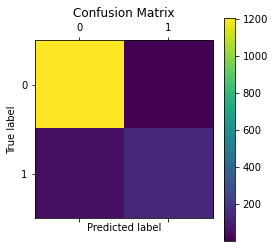

In [12]:
import matplotlib.pyplot as plt

plt.matshow(matrix)
plt.colorbar()

plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Untuk memvisualisasikan confusion matrix maka lakukan import matplotlib.pyplot as plt kemudian panggil plt.matshow dengan menyertakan variabel matrix sebagai parameternya. Sedangkan, plt.colorbar untuk memunculkan colorbar yang ada di sebelah kanan. Untuk menyertakan judul, maka dapat memanggil plt.title dan juga untuk menyertakan label, maka dapat menggunakan plt.ylabel dan plt.xlabel, setelah itu untuk menampilkan hasilnya adalah dengan memanggil plt.show. dari hasil tersebut dapat diketahui bahwa warna kuning merepresntasikan true negative, dan ungu atas kanan merepresentasikan false positive, ungu bawah kiri merepresentasikan nilai false negative, dan sebelah kanan bawah merepresentasikan nilai true positive. Nilai 0 pada sumbu y pada kasus ini merepresentasikan nilai 0 yang sebenarnya/ yang diharapkan. 

### Accuracy (Hasil prediksi yang tepat)

- TP = True Positive.

- TN = True Negative.

- FP = False Positive.

- FN = False Negative.

- correct = Semua hasil prediksi yang tepat.

- total = Total jumlah prediksi.

In [13]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.964824120603015

Panggil module terlebih dahulu dengan import accuracy_score dan menyertakan y_test dan y_pred sebagai parameter dari accuracy_score nya. 


### Precission & Recall

- TP = True Positive.

- FP = False Negative.

In [14]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.9927536231884058

Import module dan import precission_score yang kemudian menyertakan parameter y_test dan y_pred. Rentang nilai precission berada di antara 0 dan 1.

### Recall or True Positive Rate (TPR) or Sensitivity

- TP = True Positive.

- FN = True Negative.

In [15]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.7405405405405405

Memanggil module dengan mengimport recall_score yang berikutnya juga memanghil fungsi recall_score dengan menyertakan parameter y_test dan y_pred.

### F1 Score

In [16]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.8482972136222909

Memanggil module kemudian import f1_score yang selanjutnya memanggil fungsi f1_score dengan menyertakan y_test dan y_pred sebagai parameternya.

### ROC : Reveiver Opersting Characteristic

Pembandingan nilai Recall (TPR) dan nilai Fallout (FPR)


- FP = False Positive.

- TN = True Negative.

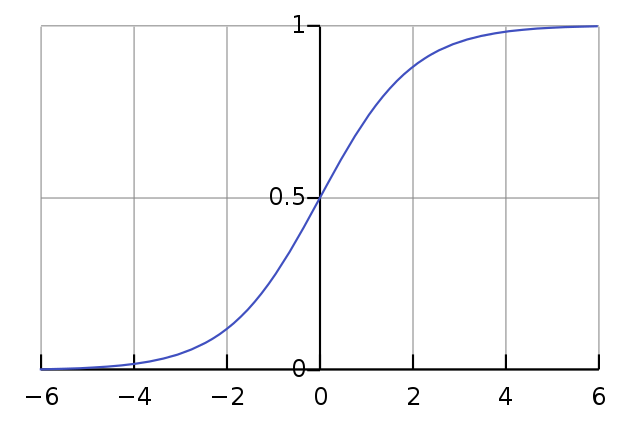

Pada umumnya kurva ROC akan menampilkan gsris linear diagonal yanh akan merepresentasikan random classifier. Ketika hasil plotting dari suatu model makin mengarah ke sisi kiri atas, maka performanya akan dinilai semakin baik dan begitu juga sebaliknya jika lebih mengarah ke kanan maka dapat dinilai semakin buruk. Suatu model akan mendapat nilai sempurna ketika posisinya berada di paling kiri. 

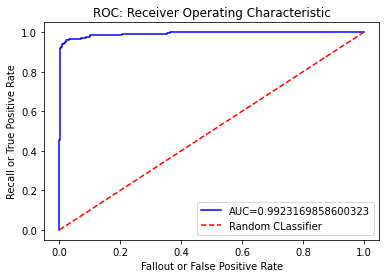

In [17]:
from sklearn.metrics import roc_curve, auc

prob_estimates = model.predict_proba(X_test_tfidf)

fpr, tpr, threshhold = roc_curve(y_test, prob_estimates[:, 1])
nilai_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label=f'AUC={nilai_auc}')
plt.plot([0,1], [0,1], 'r--', label='Random CLassifier')

plt.title('ROC: Receiver Operating Characteristic')
plt.xlabel('Fallout or False Positive Rate')
plt.ylabel('Recall or True Positive Rate')
plt.legend()
plt.show()

Import module dan kemudian import roc_curve, auc. auc merupakan area under cut, representasi dari wilayah atau area yang berada di bawah kurva yang semakin mendekati nilai sempurna, maka nilai auc nya akan mendekati 1. Selanjutnya, untuk menghitung probabilitu estimatesnya, maka panggil model.predict_proba dengan menyertakan X_test_tfidf sebagai prameternya dengan ditampung dalam variabel prob_estimates. Kemudian untuk membentuk roc curve maka dapat memanggil fungsi roc_curve dengan melewatkan dua buah parameter, yaitu y_tes dan prob_estimates. Prob estimates di sini akan menyertakan kolom yang ke dua saja, oleh karena itu index dari prob_estimatesnya diberi nilai 1 yang akan ditampung pada 3 buah variabel, yaitu fpr, tpr, dan threshhold. Selanjutnya berdasarkan nilai fpr dan tpr tersebut, maka dapat menghitung nilai auc dengan memanggil fungsi auc dengan menyertakan fpr dan tor sebagai parameter yang akan ditampung pada variabel nilai_auc.

Untuk memvisualisasikan haslinya maka langkah pertama adalah dengan melakukan ploting terlebih dahulu garis biru dengan menyertakan fpr dan tpr dengan menyertakan sting b yang berarti warna biru untuk garisnya dan sertakan label AUC untuk nilai_auc nya. Selanjutnya lakukan ploting garis untum random classifier dengan memanggil 0,1 dan 0,1 baik untuk x maupun y, yang akan diset dengan garis putus-putus berwsrna merah. Kemudian untuk labelnya akan diberi nama Random Classifier. 

Ploting tersebut disertakan oleh judul, x label dan y label, juga menyertakan legend yang berisi nilai auc dan legendnya. Nilai auc tersebut merepresentasikan bahwa nilai luasan area yang berada di bawah kurva berwarna biru adalah 99% dari keseluruhan area plotingnya.

### SUMBER :  https://www.youtube.com/watch?v=oe7DW4rSH1o 